## Network Intrusion Detection System (NIDS) - Random Forest Classifier
NSL-KDD Dataset Multi-class Classification

# 1. Import Required Libraries

## Core libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

## Model selection and validation

In [3]:

from sklearn.model_selection import train_test_split, StratifiedKFold

## Machine learning models

In [4]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Performance evaluation

In [5]:

from sklearn.metrics import (accuracy_score, precision_score, f1_score, recall_score,
                           multilabel_confusion_matrix, roc_curve, classification_report,
                           confusion_matrix)

print("All libraries imported successfully!")

All libraries imported successfully!


# 2. Load and Explore Dataset


## Load datasets

In [6]:
try:
    train_dataset = pd.read_csv('NSL-KDD__Multiclass_Classification_Dataset.csv')
    test_dataset = pd.read_csv('KDDTest+.csv')
    print("✓ Datasets loaded successfully!")
    print(f"Training dataset shape: {train_dataset.shape}")
    print(f"Test dataset shape: {test_dataset.shape}")
except FileNotFoundError as e:
    print(f"❌ Error loading datasets: {e}")
    print("Please ensure the CSV files are in the correct directory")
    # You can uncomment the line below if you want the notebook to stop here
    # raise


✓ Datasets loaded successfully!
Training dataset shape: (4047, 43)
Test dataset shape: (22544, 43)


## Display basic information about the datasets

In [7]:

print("=== Training Dataset Info ===")
print(train_dataset.info())
print("\n=== Training Dataset - First 5 rows ===")
display(train_dataset.head())

print("\n=== Test Dataset Info ===")
print(test_dataset.info())
print("\n=== Test Dataset - First 5 rows ===")
display(test_dataset.head())

=== Training Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     4047 non-null   int64  
 1   protocol_type                4047 non-null   object 
 2   service                      4047 non-null   object 
 3   flag                         4047 non-null   object 
 4   src_bytes                    4047 non-null   int64  
 5   dst_bytes                    4047 non-null   int64  
 6   land                         4047 non-null   int64  
 7   wrong_fragment               4047 non-null   int64  
 8   urgent                       4047 non-null   int64  
 9   hot                          4047 non-null   int64  
 10  num_failed_logins            4047 non-null   int64  
 11  logged_in                    4047 non-null   int64  
 12  num_compromised              4047 non-null   i

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_name,difficultylevel
0,0,tcp,ftp,S0,0,0,0,0,0,0,...,0.07,0.06,0.0,0.0,1.0,1.0,0.0,0.0,DoS,19
1,0,tcp,http_443,S0,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,1.0,1.0,0.0,0.0,DoS,18
2,0,tcp,uucp_path,S0,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,1.0,1.0,0.0,0.0,DoS,20
3,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.08,0.0,0.0,1.0,1.0,0.0,0.0,DoS,21
4,0,tcp,private,S0,0,0,0,0,0,0,...,0.09,0.06,0.0,0.0,1.0,1.0,0.0,0.0,DoS,21



=== Test Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  in

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficultylevel
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


## Check for missing values and data types

In [8]:

print("=== Missing Values Analysis ===")
print("Training dataset missing values:")
print(train_dataset.isnull().sum().sum())
print("\nTest dataset missing values:")
print(test_dataset.isnull().sum().sum())

print("\n=== Data Types ===")
print("Training dataset data types:")
print(train_dataset.dtypes.value_counts())

=== Missing Values Analysis ===
Training dataset missing values:
0

Test dataset missing values:
0

=== Data Types ===
Training dataset data types:
int64      24
float64    15
object      4
Name: count, dtype: int64


# 3. Data Cleaning and Preprocessing

In [9]:

print("=== Data Cleaning ===")


=== Data Cleaning ===


## Handle infinite values and missing data

In [10]:

train_dataset = train_dataset.replace([np.inf, -np.inf], np.nan) 
train_dataset = train_dataset.dropna()
train_dataset = train_dataset.drop_duplicates()
print(f'Training set - Rows after cleaning: {len(train_dataset)}')
print(f'Training set - Null values after cleaning: {train_dataset.isnull().sum().sum()}')

test_dataset = test_dataset.replace([np.inf, -np.inf], np.nan) 
test_dataset = test_dataset.dropna()
test_dataset = test_dataset.drop_duplicates()
print(f'Test set - Rows after cleaning: {len(test_dataset)}')
print(f'Test set - Null values after cleaning: {test_dataset.isnull().sum().sum()}')

Training set - Rows after cleaning: 4047
Training set - Null values after cleaning: 0
Test set - Rows after cleaning: 22544
Test set - Null values after cleaning: 0


# 4. Attack Category Standardization

In [11]:

print("=== Standardizing Attack Categories ===")



=== Standardizing Attack Categories ===


## Group similar attacks into main categories

In [12]:
DoS = ['apache2','mailbomb','neptune','teardrop','smurf','pod','back','land','processtable']
test_dataset = test_dataset.replace(to_replace=DoS, value='DoS')

U2R = ['httptunnel','ps','xterm','sqlattack','rootkit','buffer_overflow','loadmodule','perl']
test_dataset = test_dataset.replace(to_replace=U2R, value='U2R')

R2L = ['udpstorm','worm','snmpgetattack','sendmail','named','snmpguess','xsnoop','xlock',
       'warezclient','guess_passwd','ftp_write','multihop','imap','phf','warezmaster','spy']
test_dataset = test_dataset.replace(to_replace=R2L, value='R2L')

Probe = ['mscan','saint','ipsweep','portsweep','nmap','satan']
test_dataset = test_dataset.replace(to_replace=Probe, value='Probe')

print("Attack categories standardized successfully!")


Attack categories standardized successfully!


# 5. Target Variable Analysis

## Extract target variables (assuming they're in the second-to-last column)

In [13]:

y_train = train_dataset.iloc[:, -2].values
y_test = test_dataset.iloc[:, -2].values

print("=== Class Distribution Analysis ===")
print("\nTraining set class distribution:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
train_dist = pd.DataFrame({'Class': unique_train, 'Count': counts_train, 
                          'Percentage': counts_train/len(y_train)*100})
print(train_dist)

print("\nTest set class distribution:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
test_dist = pd.DataFrame({'Class': unique_test, 'Count': counts_test, 
                         'Percentage': counts_test/len(y_test)*100})
print(test_dist)


=== Class Distribution Analysis ===

Training set class distribution:
    Class  Count  Percentage
0     DoS   1000   24.709661
1   Probe   1000   24.709661
2     R2L    995   24.586113
3     U2R     52    1.284902
4  normal   1000   24.709661

Test set class distribution:
    Class  Count  Percentage
0     DoS   7456   33.073101
1   Probe   2421   10.738999
2     R2L   2756   12.224982
3     U2R    200    0.887154
4  normal   9711   43.075763


## Visualize class distribution

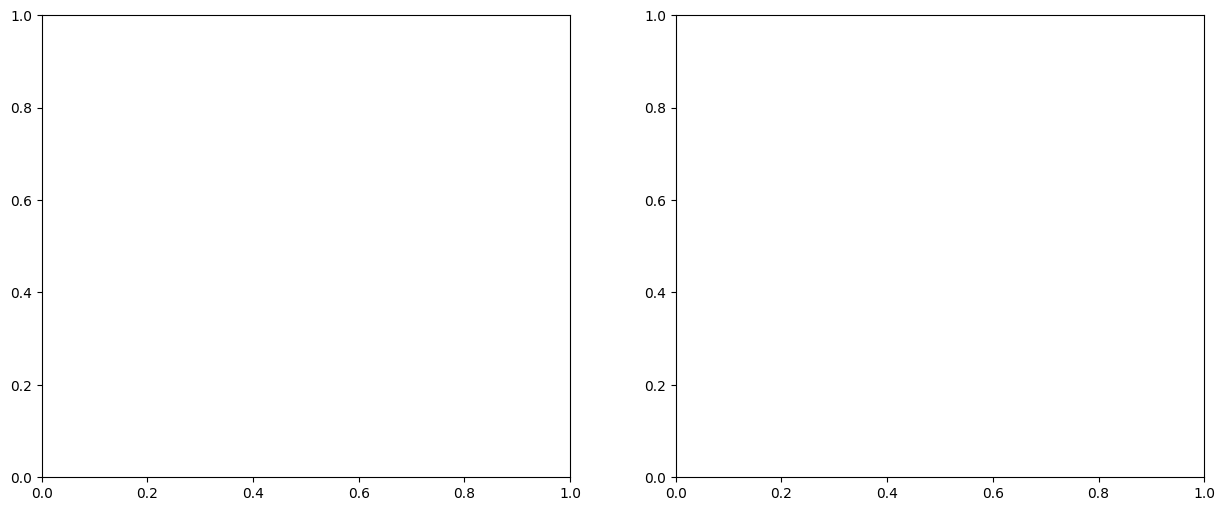

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

## Training set distribution

In [15]:
ax1.pie(counts_train, labels=unique_train, autopct='%1.1f%%', startangle=90)
ax1.set_title('Training Set - Class Distribution')

Text(0.5, 1.0, 'Training Set - Class Distribution')

## Test set distribution

In [16]:

ax2.pie(counts_test, labels=unique_test, autopct='%1.1f%%', startangle=90)
ax2.set_title('Test Set - Class Distribution')

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

# 6. Feature Engineering - One-Hot Encoding

In [17]:

print("=== One-Hot Encoding ===")


=== One-Hot Encoding ===


## Remove target columns before encoding

In [18]:
train_features = train_dataset.drop(train_dataset.columns[[-1, -2]], axis=1)
test_features = test_dataset.drop(test_dataset.columns[[-1, -2]], axis=1)


## Apply one-hot encoding

In [19]:

train_encoded = pd.get_dummies(train_features)
test_encoded = pd.get_dummies(test_features)

## Apply one-hot encoding

In [20]:
train_encoded = pd.get_dummies(train_features)
test_encoded = pd.get_dummies(test_features)
print(f"Features before encoding: {train_features.shape[1]}")
print(f"Features after encoding - Training: {train_encoded.shape[1]}")
print(f"Features after encoding - Test: {test_encoded.shape[1]}")

Features before encoding: 41
Features after encoding - Training: 109
Features after encoding - Test: 116


## Ensure both datasets have the same features

In [21]:

print("=== Feature Alignment ===")

=== Feature Alignment ===


In [22]:
train_cols = set(train_encoded.columns)
test_cols = set(test_encoded.columns)

## Add missing columns

In [23]:

missing_in_train = test_cols - train_cols
missing_in_test = train_cols - test_cols
print(f"Features missing in training set: {len(missing_in_train)}")
print(f"Features missing in test set: {len(missing_in_test)}")


Features missing in training set: 7
Features missing in test set: 0


## Add missing columns with zeros


In [24]:

for col in missing_in_train:
    train_encoded[col] = 0

for col in missing_in_test:
    test_encoded[col] = 0


## Ensure same column order

In [25]:
train_encoded = train_encoded.reindex(sorted(train_encoded.columns), axis=1)
test_encoded = test_encoded.reindex(sorted(test_encoded.columns), axis=1)

print(f"Final feature count - Training: {train_encoded.shape[1]}")
print(f"Final feature count - Test: {test_encoded.shape[1]}")


Final feature count - Training: 116
Final feature count - Test: 116


## Create feature matrices

In [26]:
X_train = train_encoded.values
X_test = test_encoded.values


# 7. Label Encoding for Target Variables


In [27]:

print("=== Label Encoding ===")

=== Label Encoding ===


## Encode target variables

In [28]:

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


## Store class names for reference

In [29]:

class_names = le.classes_
class_mapping = {i: name for i, name in enumerate(class_names)}

print("Class mapping:")
for i, name in class_mapping.items():
    print(f"  {i}: {name}")

print(f"\nTraining set encoded shape: {y_train_encoded.shape}")
print(f"Test set encoded shape: {y_test_encoded.shape}")


Class mapping:
  0: DoS
  1: Probe
  2: R2L
  3: U2R
  4: normal

Training set encoded shape: (4047,)
Test set encoded shape: (22544,)


# 8. Feature Scaling

In [30]:
print("=== Feature Scaling ===")

# Apply MinMax scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled feature range: [{X_train_scaled.min():.3f}, {X_train_scaled.max():.3f}]")

=== Feature Scaling ===
Feature scaling completed!
Scaled feature range: [0.000, 1.000]


# 9. Model Selection and Training

In [31]:

print("=== Model Configuration ===")


=== Model Configuration ===


## Choose your classifier (uncomment one)

In [32]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print(f"Selected classifier: {type(classifier).__name__}")
print(f"Classifier parameters: {classifier.get_params()}")

Selected classifier: RandomForestClassifier
Classifier parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


# 10. Cross-Validation Evaluation


In [33]:
print("=== Cross Validation Setup ===")

=== Cross Validation Setup ===


## Setup stratified k-fold cross validation


In [34]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


## Initialize metrics storage

In [35]:

cv_metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'tnr': [],  # True Negative Rate (Specificity)
    'fpr': [],  # False Positive Rate
    'fnr': [],  # False Negative Rate
    'far': []   # False Alarm Rate
}

print("Starting cross-validation...")

Starting cross-validation...


## Perform cross-validation

In [36]:

fold = 1
for train_idx, val_idx in cv.split(X_train_scaled, y_train_encoded):
    print(f"Processing fold {fold}/5...")
    
    # Split data for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]
    
    # Train classifier
    classifier.fit(X_train_fold, y_train_fold)
    
    # Make predictions
    y_pred_fold = classifier.predict(X_val_fold)
    
    # Calculate basic metrics
    cv_metrics['accuracy'].append(accuracy_score(y_val_fold, y_pred_fold))
    cv_metrics['precision'].append(np.mean(precision_score(y_val_fold, y_pred_fold, 
                                                          average=None, zero_division=0)))
    cv_metrics['recall'].append(np.mean(recall_score(y_val_fold, y_pred_fold, 
                                                    average=None, zero_division=0)))
    cv_metrics['f1'].append(np.mean(f1_score(y_val_fold, y_pred_fold, 
                                            average=None, zero_division=0)))
    
    # Calculate confusion matrix-based metrics
    cm = multilabel_confusion_matrix(y_val_fold, y_pred_fold)
    
    TNR, FPR, FNR, FAR = [], [], [], []
    
    for i in range(len(class_names)):
        if i < len(cm):
            tn, fn, tp, fp = cm[i][0][0], cm[i][1][0], cm[i][1][1], cm[i][0][1]
            
            # Calculate rates with zero-division protection
            TNR.append(tn / (fp + tn) if (fp + tn) > 0 else 0)
            FPR.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
            FNR.append(fn / (fn + tp) if (fn + tp) > 0 else 0)
            FAR.append((fp + fn) / (fp + fn + tp + tn) if (fp + fn + tp + tn) > 0 else 0)
    
    cv_metrics['tnr'].append(np.mean(TNR))
    cv_metrics['fpr'].append(np.mean(FPR))
    cv_metrics['fnr'].append(np.mean(FNR))
    cv_metrics['far'].append(np.mean(FAR))
    
    fold += 1
print("Cross-validation completed!")
    


Processing fold 1/5...
Processing fold 2/5...
Processing fold 3/5...
Processing fold 4/5...
Processing fold 5/5...
Cross-validation completed!


# 11. Cross-Validation Results


In [37]:
print("=" * 60)
print("         CROSS-VALIDATION RESULTS")
print("=" * 60)
for metric_name, values in cv_metrics.items():
    mean_val = np.mean(values)
    std_val = np.std(values)
    print(f"{metric_name.upper():20}: {mean_val:.4f} ± {std_val:.4f}")

         CROSS-VALIDATION RESULTS
ACCURACY            : 0.9889 ± 0.0035
PRECISION           : 0.9738 ± 0.0201
RECALL              : 0.9658 ± 0.0271
F1                  : 0.9687 ± 0.0207
TNR                 : 0.9971 ± 0.0009
FPR                 : 0.0029 ± 0.0009
FNR                 : 0.0342 ± 0.0271
FAR                 : 0.0044 ± 0.0014


## Create a summary DataFrame

In [38]:

cv_results_df = pd.DataFrame({
    'Metric': [k.upper() for k in cv_metrics.keys()],
    'Mean': [np.mean(v) for v in cv_metrics.values()],
    'Std': [np.std(v) for v in cv_metrics.values()]
})

display(cv_results_df)


,Metric,Mean,Std
0,ACCURACY,0.988882,0.003493
1,PRECISION,0.973847,0.020103
2,RECALL,0.965842,0.027073
3,F1,0.968682,0.020743
4,TNR,0.997126,0.000898
5,FPR,0.002874,0.000898
6,FNR,0.034158,0.027073
7,FAR,0.004447,0.001397


## Visualize cross-validation results


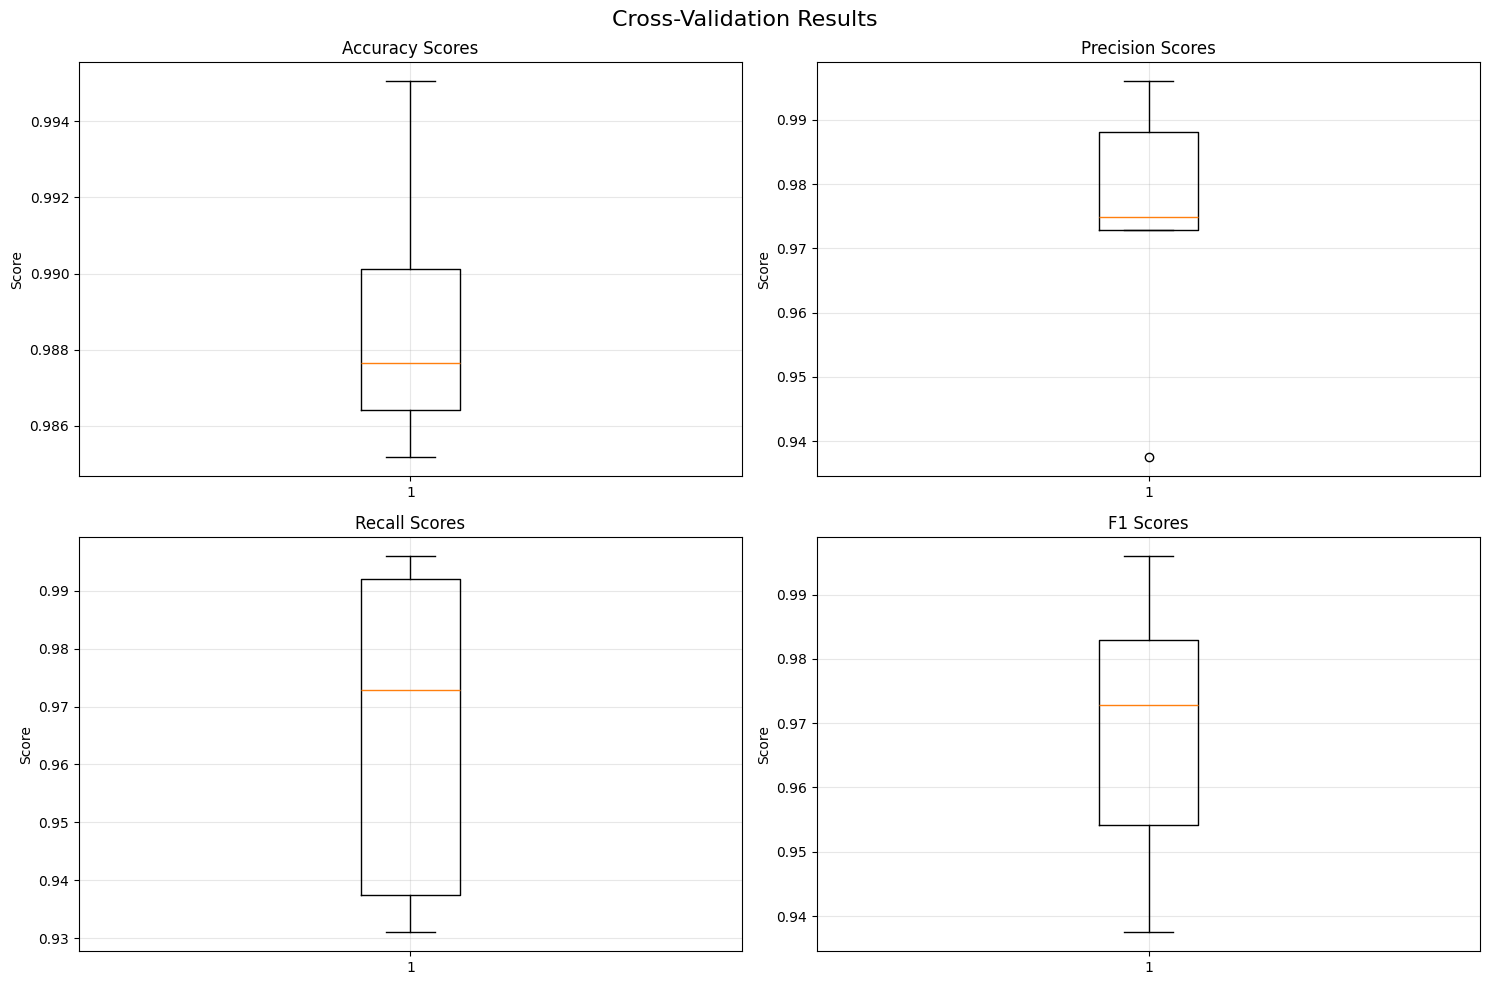

In [39]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Cross-Validation Results', fontsize=16)

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    ax.boxplot(cv_metrics[metric])
    ax.set_title(f'{metric.title()} Scores')
    ax.set_ylabel('Score')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# 12. Final Model Training and Test Set Evaluation

In [40]:
print("=== Final Model Training ===")


=== Final Model Training ===


## Train on full training set


In [41]:

classifier.fit(X_train_scaled, y_train_encoded)
print("Model trained on full training set!")


Model trained on full training set!


## Predict test set

In [42]:
y_test_pred = classifier.predict(X_test_scaled)
print("Test set predictions completed!")


Test set predictions completed!


## Calculate test set metrics


In [43]:
print("=== Test Set Performance ===")

test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
test_precision = np.mean(precision_score(y_test_encoded, y_test_pred, average=None, zero_division=0))
test_recall = np.mean(recall_score(y_test_encoded, y_test_pred, average=None, zero_division=0))
test_f1 = np.mean(f1_score(y_test_encoded, y_test_pred, average=None, zero_division=0))

print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")


=== Test Set Performance ===
Accuracy:  0.7917
Precision: 0.7948
Recall:    0.5741
F1-Score:  0.6157



## Detailed confusion matrix analysis


In [44]:
cm_test = multilabel_confusion_matrix(y_test_encoded, y_test_pred)

test_TNR, test_FPR, test_FNR, test_FAR = [], [], [], []

for i in range(len(class_names)):
    if i < len(cm_test):
        tn, fn, tp, fp = cm_test[i][0][0], cm_test[i][1][0], cm_test[i][1][1], cm_test[i][0][1]
        
        test_TNR.append(tn / (fp + tn) if (fp + tn) > 0 else 0)
        test_FPR.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
        test_FNR.append(fn / (fn + tp) if (fn + tp) > 0 else 0)
        test_FAR.append((fp + fn) / (fp + fn + tp + tn) if (fp + fn + tp + tn) > 0 else 0)

print(f"\nSpecificity (TNR): {np.mean(test_TNR):.4f}")
print(f"False Positive Rate: {np.mean(test_FPR):.4f}")
print(f"False Negative Rate: {np.mean(test_FNR):.4f}")
print(f"False Alarm Rate: {np.mean(test_FAR):.4f}")



Specificity (TNR): 0.9302
False Positive Rate: 0.0698
False Negative Rate: 0.4259
False Alarm Rate: 0.0833


# 13. Detailed Classification Report


In [45]:
print("=" * 60)
print("         DETAILED CLASSIFICATION REPORT")
print("=" * 60)


         DETAILED CLASSIFICATION REPORT


##

In [46]:
report = classification_report(y_test_encoded, y_test_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         DoS       0.95      0.81      0.87      7456
       Probe       0.81      0.68      0.73      2421
         R2L       0.96      0.27      0.42      2756
         U2R       0.56      0.15      0.24       200
      normal       0.71      0.97      0.82      9711

    accuracy                           0.79     22544
   macro avg       0.79      0.57      0.62     22544
weighted avg       0.83      0.79      0.77     22544



# 14. Per-Class Performance Analysis


In [47]:
print("=== Per-Class Performance Metrics ===")

=== Per-Class Performance Metrics ===


## Calculate per-class metrics


In [48]:

precision_per_class = precision_score(y_test_encoded, y_test_pred, average=None, zero_division=0)
recall_per_class = recall_score(y_test_encoded, y_test_pred, average=None, zero_division=0)
f1_per_class = f1_score(y_test_encoded, y_test_pred, average=None, zero_division=0)


## Create comprehensive per-class DataFrame


In [49]:

per_class_results = []
for i, class_name in enumerate(class_names):
    if i < len(precision_per_class):
        per_class_results.append({
            'Class': class_name,
            'Precision': precision_per_class[i],
            'Recall': recall_per_class[i],
            'F1-Score': f1_per_class[i],
            'Specificity': test_TNR[i] if i < len(test_TNR) else 0
        })

per_class_df = pd.DataFrame(per_class_results)
display(per_class_df)


,Class,Precision,Recall,F1-Score,Specificity
0,DoS,0.945827,0.810220,0.872788,0.977068
1,Probe,0.806213,0.675341,0.734997,0.980470
2,R2L,0.959477,0.266328,0.416927,0.998433
3,U2R,0.555556,0.150000,0.236220,0.998926
4,normal,0.706837,0.968798,0.817341,0.695940



## Visualize per-class performance


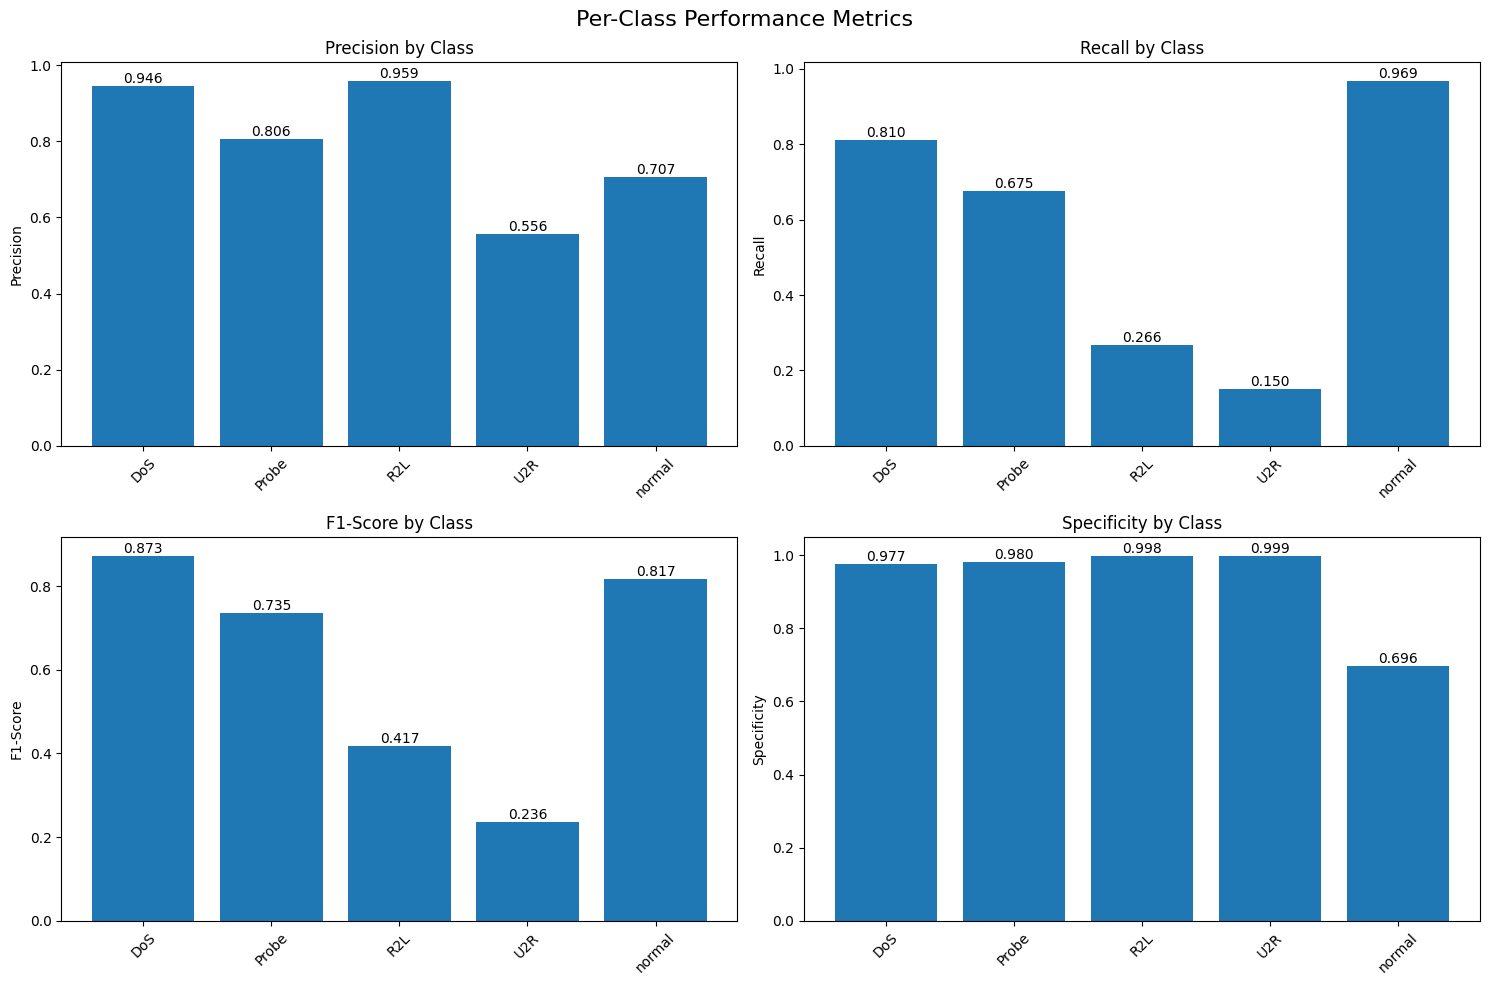

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Per-Class Performance Metrics', fontsize=16)

metrics = ['Precision', 'Recall', 'F1-Score', 'Specificity']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    bars = ax.bar(per_class_df['Class'], per_class_df[metric])
    ax.set_title(f'{metric} by Class')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 15. Confusion Matrix Visualization

## Generate and visualize confusion matrix


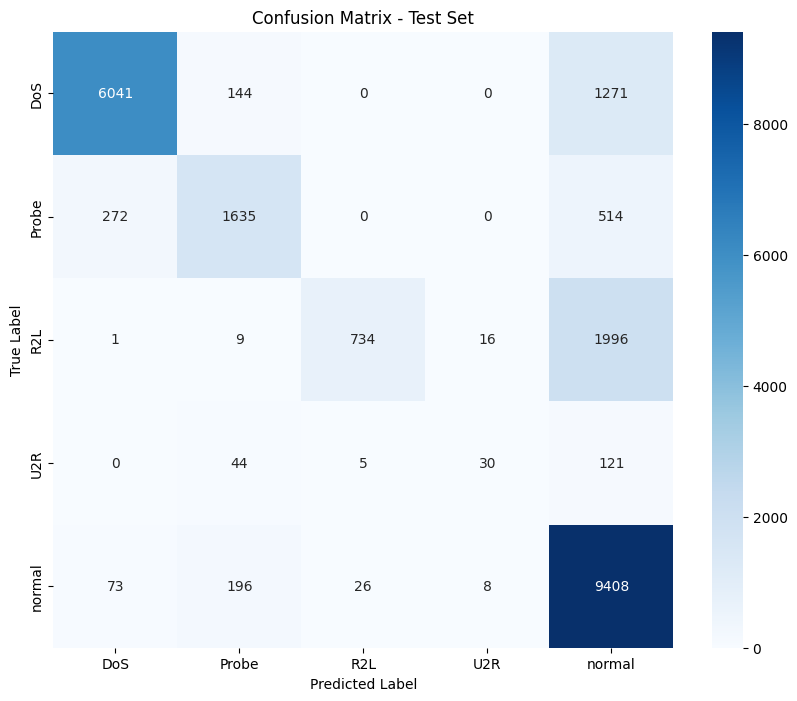

In [51]:

cm_overall = confusion_matrix(y_test_encoded, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_overall, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



# 16. Feature Importance Analysis (for Random Forest)

=== Feature Importance Analysis ===
Top 20 Most Important Features:
                         Feature  Importance
108                    src_bytes    0.118702
9             dst_host_srv_count    0.068424
109                    srv_count    0.056273
29                     logged_in    0.052081
2                      dst_bytes    0.048998
6    dst_host_same_src_port_rate    0.046368
63              service_ftp_data    0.037194
25                           hot    0.037178
0                          count    0.035881
7         dst_host_same_srv_rate    0.035233
4         dst_host_diff_srv_rate    0.032827
58                 service_ecr_i    0.029089
10   dst_host_srv_diff_host_rate    0.025690
57                 service_eco_i    0.025446
115               wrong_fragment    0.024146
3                 dst_host_count    0.023858
66                  service_http    0.021458
5           dst_host_rerror_rate    0.018570
38             protocol_type_tcp    0.018516
37            protocol_type_icmp

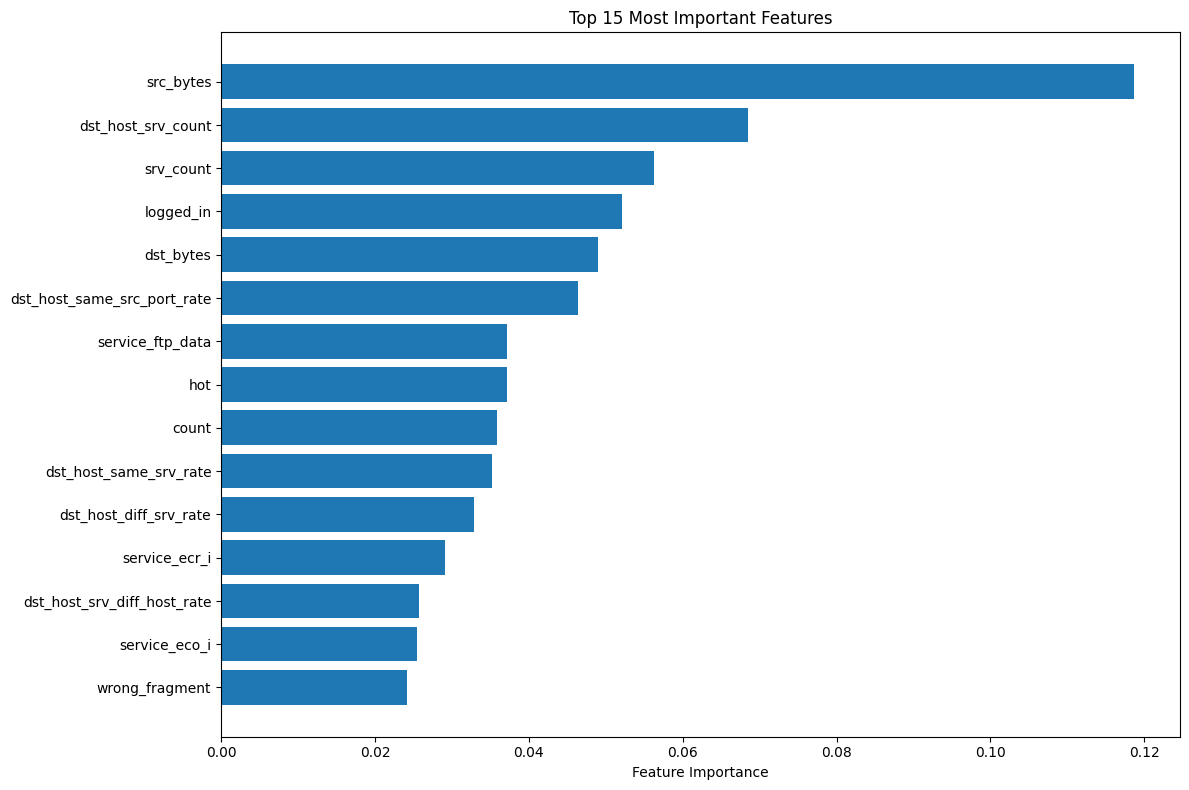

In [52]:
if hasattr(classifier, 'feature_importances_'):
    print("=== Feature Importance Analysis ===")
    
    # Get feature names (if available)
    feature_names = train_encoded.columns.tolist()
    
    # Create feature importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': classifier.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Display top 20 most important features
    print("Top 20 Most Important Features:")
    print(feature_importance.head(20))
    
    # Visualize top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Most Important Features')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()



## 17. Model Summary and Comparison

In [53]:

print("=" * 80)
print("                           MODEL SUMMARY")
print("=" * 80)

summary_data = {
    'Dataset': ['NSL-KDD Training', 'NSL-KDD Test'],
    'Samples': [len(X_train), len(X_test)],
    'Features': [X_train.shape[1], X_test.shape[1]],
    'Classes': [len(np.unique(y_train_encoded)), len(np.unique(y_test_encoded))]
}

summary_df = pd.DataFrame(summary_data)
print("Dataset Information:")
display(summary_df)

print(f"\nClassifier: {type(classifier).__name__}")
print(f"Cross-validation: {cv.n_splits}-fold Stratified")
print(f"Feature scaling: MinMaxScaler")

print("\nFinal Performance Summary:")
print(f"  Cross-validation Accuracy: {np.mean(cv_metrics['accuracy']):.4f} ± {np.std(cv_metrics['accuracy']):.4f}")
print(f"  Test Set Accuracy:         {test_accuracy:.4f}")
print(f"  Test Set F1-Score:         {test_f1:.4f}")
print(f"  Test Set Precision:        {test_precision:.4f}")
print(f"  Test Set Recall:           {test_recall:.4f}")

print("\n" + "=" * 80)
print("          MODEL TRAINING AND EVALUATION COMPLETED! ")
print("=" * 80)


                           MODEL SUMMARY
Dataset Information:


,Dataset,Samples,Features,Classes
0,NSL-KDD Training,4047,116,5
1,NSL-KDD Test,22544,116,5



Classifier: RandomForestClassifier
Cross-validation: 5-fold Stratified
Feature scaling: MinMaxScaler

Final Performance Summary:
  Cross-validation Accuracy: 0.9889 ± 0.0035
  Test Set Accuracy:         0.7917
  Test Set F1-Score:         0.6157
  Test Set Precision:        0.7948
  Test Set Recall:           0.5741

          MODEL TRAINING AND EVALUATION COMPLETED! 



# 18. Save Results (Optional)


## Uncomment and modify as needed to save results

## Save the trained model
 import joblib
 joblib.dump(classifier, 'nids_random_forest_model.pkl')
 joblib.dump(scaler, 'nids_feature_scaler.pkl')
 joblib.dump(le, 'nids_label_encoder.pkl')

## Save results to CSV
 per_class_df.to_csv('per_class_results.csv', index=False)
 cv_results_df.to_csv('cross_validation_results.csv', index=False)

 print("Model and results saved successfully!")

**Note**: This notebook provides a comprehensive analysis of the Network Intrusion Detection System using the NSL-KDD dataset. Make sure you have the required CSV files (`NSL-KDD__Multiclass_Classification_Dataset.csv` and `KDDTest+.csv`) in your working directory before running the notebook.